In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

In [2]:
# For Jupyter inline visualization
%matplotlib inline

# Load the dataset using Pandas
pandas_data = pd.read_csv('../data/medals_total.csv')

# Load the dataset using Polars
polars_data = pl.read_csv('../data/medals_total.csv')

# --- Pandas Summary Statistics ---
count     92.000000
mean      11.336957
std       19.610648
min        1.000000
25%        2.000000
50%        5.000000
75%        9.000000
max      126.000000
Name: Total, dtype: float64


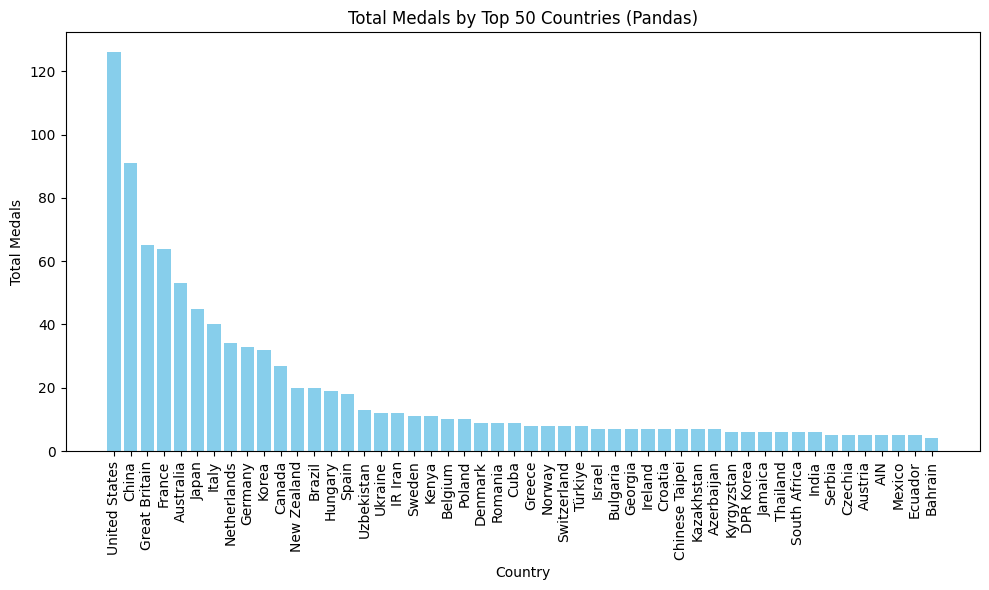

In [3]:

# --- Pandas Section ---
print("# --- Pandas Summary Statistics ---")
# Generate summary statistics using Pandas
pandas_summary_stats = pandas_data['Total'].describe()
print(pandas_summary_stats)

# Sort the data by 'Total' column in descending order and take the top 50 countries
pandas_top_countries = pandas_data.sort_values(by='Total', ascending=False).head(50)

# Create a bar chart for total medals by top 50 countries using Pandas
plt.figure(figsize=(10, 6))
plt.bar(pandas_top_countries['country'], pandas_top_countries['Total'], color='skyblue')
plt.title('Total Medals by Top 50 Countries (Pandas)')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()

# --- Polars Summary Statistics ---
shape: (1, 7)
┌───────────┬────────┬───────────┬─────┬─────┬─────┬─────┐
│ mean      ┆ median ┆ std       ┆ min ┆ max ┆ 25% ┆ 75% │
│ ---       ┆ ---    ┆ ---       ┆ --- ┆ --- ┆ --- ┆ --- │
│ f64       ┆ f64    ┆ f64       ┆ i64 ┆ i64 ┆ f64 ┆ f64 │
╞═══════════╪════════╪═══════════╪═════╪═════╪═════╪═════╡
│ 11.336957 ┆ 5.0    ┆ 19.610648 ┆ 1   ┆ 126 ┆ 2.0 ┆ 9.0 │
└───────────┴────────┴───────────┴─────┴─────┴─────┴─────┘


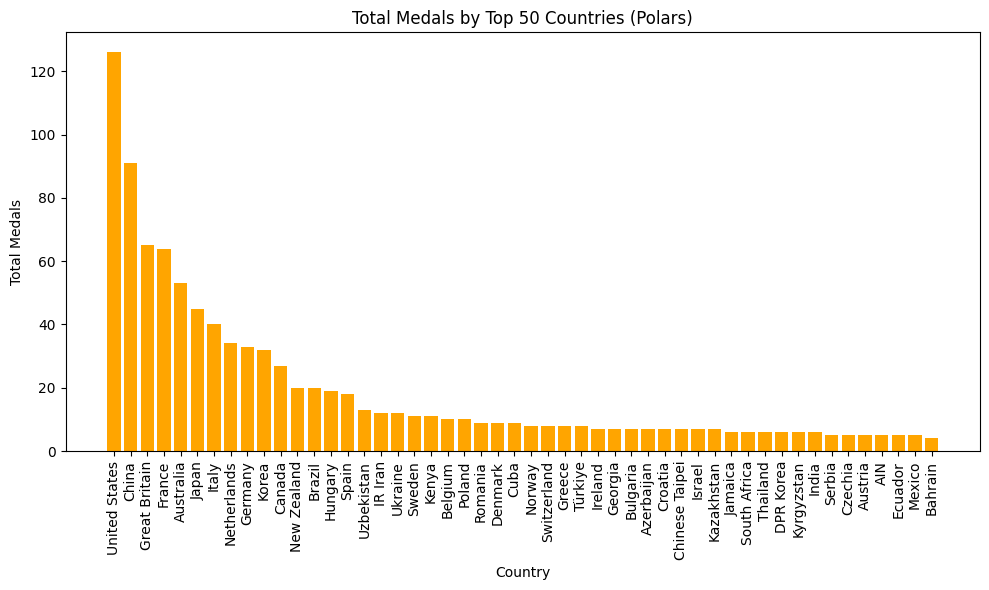

In [4]:

# --- Polars Section ---
print("# --- Polars Summary Statistics ---")
# Generate summary statistics using Polars
polars_summary_stats = polars_data.select([
    pl.col("Total").mean().alias("mean"),
    pl.col("Total").median().alias("median"),
    pl.col("Total").std().alias("std"),
    pl.col("Total").min().alias("min"),
    pl.col("Total").max().alias("max"),
    pl.col("Total").quantile(0.25).alias("25%"),
    pl.col("Total").quantile(0.75).alias("75%")
])
print(polars_summary_stats)

# Sort the data by 'Total' column in descending order and take the top 50 countries
polars_top_countries = polars_data.sort("Total", descending=True).head(50)

# Convert Polars dataframe to Pandas for visualization
polars_top_countries_pd = polars_top_countries.to_pandas()

# Create a bar chart for total medals by top 50 countries using Polars
plt.figure(figsize=(10, 6))
plt.bar(polars_top_countries_pd['country'], polars_top_countries_pd['Total'], color='orange')
plt.title('Total Medals by Top 50 Countries (Polars)')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()